# Lens Modeling for DESIJ0215-2909

##### Author(s): Nusrath Jahan, Anowar J. Shajib

In [1]:
import lenstronomy
import numpy as np
import corner
import h5py
import matplotlib.pyplot as plt

%matplotlib inline 

## Loading Data from h5 Files

In [2]:
with h5py.File('DESIJ0215-2909_F140W.h5', 'r') as f:
    kwargs_data = {}
    for key in f:
        kwargs_data[key] = f[key][()]
        
kwargs_data

{'background_rms': 0.013773692784527593,
 'dec_at_xy_0': -4.039999999999996,
 'exposure_time': array([[406.06006, 405.521  , 526.04736, ..., 409.48416, 629.0853 ,
         482.24066],
        [518.8527 , 482.49246, 488.00433, ..., 436.29407, 406.28143,
         445.75092],
        [448.71164, 398.90408, 416.24097, ..., 429.33853, 420.62997,
         629.8828 ],
        ...,
        [509.8056 , 269.61142, 103.08534, ..., 433.3534 , 363.96698,
         452.30103],
        [446.70148, 385.2663 , 255.33597, ..., 460.0034 , 439.11295,
         640.3388 ],
        [580.9745 , 501.182  , 282.83368, ..., 383.9875 , 380.7864 ,
         368.552  ]], dtype=float32),
 'image_data': array([[-0.01862662, -0.00956936,  0.00025477, ..., -0.01687474,
         -0.01497528, -0.00593937],
        [ 0.0122624 ,  0.01622887,  0.01016984, ..., -0.0007968 ,
         -0.01004759, -0.01541612],
        [-0.005416  , -0.00861981,  0.00442341, ...,  0.0101959 ,
         -0.01310341, -0.01542239],
        ...,
   

In [3]:
with h5py.File('psf_F140W.h5', 'r') as f:
    kwargs_psf = {}
    for key in f:
        kwargs_psf[key] = f[key][()]
        
kwargs_psf['psf_type'] = 'PIXEL'

kwargs_psf

{'kernel_point_source': array([[5.7422681e-06, 4.5087054e-06, 2.4900439e-06, ..., 1.8486933e-06,
         3.2385867e-06, 4.4331632e-06],
        [3.9503216e-06, 9.9817180e-06, 6.5966469e-06, ..., 3.9997908e-06,
         6.6143798e-06, 4.1430776e-06],
        [2.9697005e-06, 5.5563592e-06, 1.2795975e-05, ..., 7.8115263e-06,
         5.1404800e-06, 1.7530243e-06],
        ...,
        [1.6921831e-06, 3.7347368e-06, 7.6415899e-06, ..., 1.1465157e-05,
         5.3933368e-06, 1.6360833e-06],
        [2.8819463e-06, 6.2348781e-06, 4.7564718e-06, ..., 4.5906190e-06,
         8.7221979e-06, 3.7005334e-06],
        [3.7170516e-06, 3.6243027e-06, 1.6518559e-06, ..., 2.0127884e-06,
         3.2246478e-06, 5.1252514e-06]], dtype=float32),
 'psf_type': 'PIXEL'}

## Loading Imaging Data

/var/folders/k8/sj0v8p9j6mq0ks525cj30mzm0000gn/T/ipykernel_86948/1301220401.py:3: RuntimeWarning: invalid value encountered in log10
  plt.matshow(np.log10(image_data), origin='lower', cmap='cubehelix')


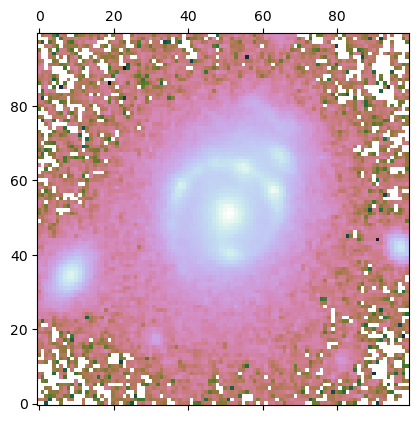

In [4]:
image_data = kwargs_data['image_data']

plt.matshow(np.log10(image_data), origin='lower', cmap='cubehelix')

## Creating Mask

/var/folders/k8/sj0v8p9j6mq0ks525cj30mzm0000gn/T/ipykernel_86948/21420736.py:69: RuntimeWarning: divide by zero encountered in log10
  plt.matshow(np.log10(image_data*mask), origin='lower', cmap='cubehelix')
/var/folders/k8/sj0v8p9j6mq0ks525cj30mzm0000gn/T/ipykernel_86948/21420736.py:69: RuntimeWarning: invalid value encountered in log10
  plt.matshow(np.log10(image_data*mask), origin='lower', cmap='cubehelix')


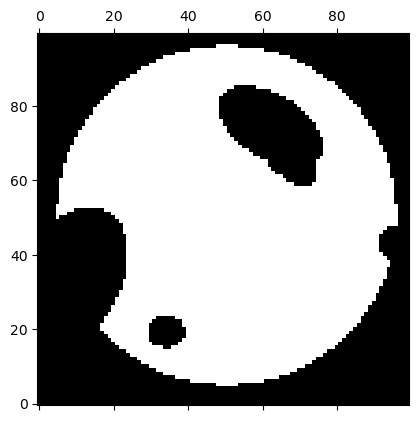

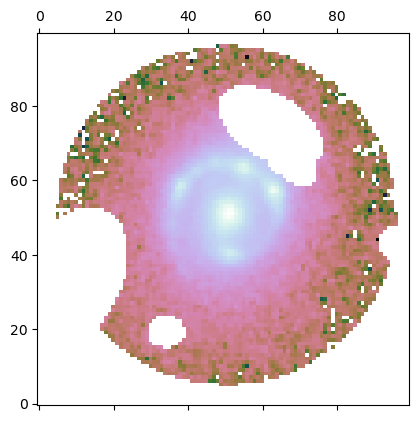

In [5]:
from lenstronomy.Util import mask_util, util
from lenstronomy.Data.coord_transforms import Coordinates

    
ra_at_xy_0 = kwargs_data['ra_at_xy_0']
dec_at_xy_0 = kwargs_data['dec_at_xy_0']
transform_pix2angle = kwargs_data['transform_pix2angle']


coords = Coordinates(transform_pix2angle, ra_at_xy_0, dec_at_xy_0)
num_pix = len(kwargs_data['image_data'])

x_coords, y_coords = coords.coordinate_grid(num_pix, num_pix)

r = 3.65 # arcsecond
lens_center_ra = 0
lens_center_dec = 0

mask_outer = mask_util.mask_center_2d(lens_center_ra,
                                      lens_center_dec,
                                      r,
                                      util.image2array(x_coords),
                                      util.image2array(y_coords))

mask_ext_1 = mask_util.mask_ellipse(util.image2array(x_coords),
                                   util.image2array(y_coords),
                                   lens_center_ra+1.3,
                                   lens_center_dec-2.5,
                                   0.4, 0.35, 0)

mask_ext_2 = mask_util.mask_ellipse(util.image2array(x_coords),
                                   util.image2array(y_coords),
                                   lens_center_ra+3.4,
                                   lens_center_dec-1.4,
                                   1.7, 1.1, np.pi/1.5)

mask_ext_3 = mask_util.mask_ellipse(util.image2array(x_coords),
                                   util.image2array(y_coords),
                                   lens_center_ra-3.65,
                                   lens_center_dec-0.6,
                                   0.4, 0.4, 0)
 
mask_ext_4 = mask_util.mask_ellipse(util.image2array(x_coords),
                                   util.image2array(y_coords),
                                   lens_center_ra-1.3,
                                   lens_center_dec+1.25,
                                   0.8, 0.4, np.pi/0.8)

mask_ext_5 = mask_util.mask_ellipse(util.image2array(x_coords),
                                   util.image2array(y_coords),
                                   lens_center_ra-0.95,
                                   lens_center_dec+1.9,
                                   1.25, 0.7, np.pi/0.85)

    

mask = (1 - mask_outer) * (1- mask_ext_1) *\
       (1 - mask_ext_2) * (1- mask_ext_3) *\
       (1 - mask_ext_4) * (1 - mask_ext_5)

mask[mask >= 1] = 1
mask[mask < 0] = 0

mask = mask.reshape(100, 100)

plt.matshow(mask, origin='lower', cmap='cubehelix')
plt.matshow(np.log10(image_data*mask), origin='lower', cmap='cubehelix')

## Lens Modeling with Lenstronomy

In [6]:
lens_model_list = ['EPL', 'SHEAR']
source_model_list = ['SERSIC_ELLIPSE', 'SHAPELETS']
lens_light_model_list = ['SERSIC_ELLIPSE']

In [7]:
# Lens galaxy's mass model

# EPL Parameters

fixed_lens = []
kwargs_lens_init = []
kwargs_lens_sigma = []
kwargs_lower_lens = []
kwargs_upper_lens = []

fixed_lens.append({})
kwargs_lens_init.append({'theta_E': 0.8, 'gamma': 1.7, 'e1': 0.02, 'e2': -0.068,
                         'center_x': 0., 'center_y': 0.})
kwargs_lens_sigma.append({'theta_E': .2, 'gamma': .1, 'e1': 0.05, 'e2': 0.05,
                         'center_x': 0.5, 'center_y': 0.5})
kwargs_lower_lens.append({'theta_E': 0.01, 'gamma': 1., 'e1': -0.5,
                          'e2': -0.5, 'center_x': -10, 'center_y': -10})
kwargs_upper_lens.append({'theta_E': 10., 'gamma': 3., 'e1': 0.5, 'e2': 0.5,
                          'center_x': 10, 'center_y': 10})

# SHEAR Parameters

fixed_lens.append({'ra_0': 0, 'dec_0': 0})

kwargs_lens_init.append({'gamma1': -0.001, 'gamma2': -0.01})
kwargs_lens_sigma.append({'gamma1': 0.01, 'gamma2': 0.01})
kwargs_lower_lens.append({'gamma1': -0.3, 'gamma2': -0.3})
kwargs_upper_lens.append({'gamma1': 0.3, 'gamma2': 0.3})

lens_params = [kwargs_lens_init, kwargs_lens_sigma,
               fixed_lens, kwargs_lower_lens, kwargs_upper_lens]


# Lens galaxy's light model

fixed_lens_light = []
kwargs_lens_light_init = []
kwargs_lens_light_sigma = []
kwargs_lower_lens_light = []
kwargs_upper_lens_light = []

fixed_lens_light.append({'n_sersic': 4.})
kwargs_lens_light_init.append({'R_sersic': 0.5, 'n_sersic': 2, 
                               'e1': 0, 'e2': 0,
                               'center_x': 0., 'center_y': 0, 'amp': 16})
kwargs_lens_light_sigma.append({'n_sersic': 1, 'R_sersic': 0.3, 
                                'e1': 0.05, 'e2': 0.05,
                                'center_x': 0.1, 'center_y': 0.1, 'amp': 1})
kwargs_lower_lens_light.append({'e1': -0.5, 'e2': -0.5, 
                                'R_sersic': 0.001, 'n_sersic': .5,
                                'center_x': -10, 'center_y': -10, 'amp': 0})
kwargs_upper_lens_light.append({'e1': 0.5, 'e2': 0.5, 
                                'R_sersic': 10, 'n_sersic': 5.,
                                'center_x': 10, 'center_y': 10, 'amp': 100})

joint_lens_with_light = [[0, 0, ['center_x', 'center_y', 'e1', 'e2']]]

lens_light_params = [kwargs_lens_light_init, kwargs_lens_light_sigma,
                     fixed_lens_light, kwargs_lower_lens_light,
                     kwargs_upper_lens_light]


# Source galaxy's light model

# SERSIC_ELLIPSE parameters

fixed_source = []
kwargs_source_init = []
kwargs_source_sigma = []
kwargs_lower_source = []
kwargs_upper_source = []

fixed_source.append({'n_sersic': 1.})
kwargs_source_init.append({'R_sersic': 0.01, 'n_sersic': 1, 
                           'e1': 0.4, 'e2': -0.068,
                           'center_x': 0., 'center_y': 0, 'amp': 1})
kwargs_source_sigma.append({'n_sersic': 0.5, 'R_sersic': 0.001,
                            'e1': 0.05, 'e2': 0.05,
                            'center_x': 0.2, 'center_y': 0.2, 'amp': 1})
kwargs_lower_source.append({'e1': -0.5, 'e2': -0.5, 
                            'R_sersic': 0.001, 'n_sersic': .5,
                            'center_x': -10, 'center_y': -10, 'amp': 0})
kwargs_upper_source.append({'e1': 0.5, 'e2': 0.5,
                            'R_sersic': 1.0, 'n_sersic': 5.,
                            'center_x': 10, 'center_y': 10, 'amp': 100})

# SHAPELETS parameters

fixed_source.append({'n_max': 5})
kwargs_source_init.append({'center_x': 0., 'center_y': 0., 'beta': 0.01})
kwargs_source_sigma.append({'center_x': 0.2, 'center_y': 0.2, 'beta': 0.001})
kwargs_lower_source.append({'center_x': -10, 'center_y': -10, 'beta': 0.001})
kwargs_upper_source.append({'center_x': 10, 'center_y': 10, 'beta': 0.1})

source_params = [kwargs_source_init, kwargs_source_sigma,
                 fixed_source, kwargs_lower_source, kwargs_upper_source]

joint_shapelets_with_sersic = [[0, 1, ['center_x', 'center_y']]]

# combining all the above specification in the `kwargs_params` dictionary
kwargs_params = {'lens_model': lens_params,
                 'source_model': source_params,
                 'lens_light_model': lens_light_params}

kwargs_constraints = {'joint_lens_with_light': joint_lens_with_light,
                      'joint_source_with_source': joint_shapelets_with_sersic}


In [8]:
kwargs_likelihood = {'check_bounds': True,
                    'image_likelihood_mask_list': [mask]}

kwargs_numerics = {'supersampling_factor': 1,
                   'supersampling_convolution': False
                   }

In [9]:
kwargs_model = {'lens_model_list': lens_model_list,
                'source_light_model_list': source_model_list,
                'lens_light_model_list': lens_light_model_list}

multi_band_list = [[kwargs_data, kwargs_psf, kwargs_numerics]]

kwargs_data_joint = {'multi_band_list': multi_band_list,
                     'multi_band_type': 'single-band'
                     # 'multi-linear': every imaging 
                     # band has independent solutions 
                     # of the surface brightness, 
                     # 'joint-linear': there is one 
                     # joint solution of the linear 
                     # coefficients demanded across the bands.
                    }

## The Model Fitting

In [10]:
from lenstronomy.Workflow.fitting_sequence import FittingSequence

fitting_seq = FittingSequence(kwargs_data_joint, kwargs_model, 
                              kwargs_constraints, kwargs_likelihood, 
                              kwargs_params)

fitting_kwargs_list = [['PSO', {'sigma_scale': 1., 'n_particles': 500,
                                'n_iterations': 200}]
                      ]

chain_list = fitting_seq.fit_sequence(fitting_kwargs_list)
kwargs_result = fitting_seq.best_fit()

Computing the PSO ...
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
Max iteration reached! Stopping.
-1.9190398245419846 reduced X^2 of best position
-5287.914236525438 log likelihood
5511 effective number of data points
[{'theta_E': 1.053361193281203, 'gamma': 1.7972945164513847, 'e1': -0.1430601975779615, 'e2': -0.012050174538028261, 'center_x': -0.040361394154887834, 'center_y': 0.021159668949471702}, {'gamma1': -0.00040160463780644716, 'gamma2': 0.008288511719529964, 'ra_0': 0, 'dec_0': 0}] lens result
[{'amp': 1, 'R_sersic': 0.18466856843727447, 'n_sersic': 1.0, 'e1': -0.16297717570271256, 'e2': -0.3338558140181789, 'center_x': -0.020193272912705357, 'center_y': 0.14544966968520623}, {'amp': 1, 'n_max': 5, 'beta': 0.026346234259808816, 'center_x': -0.020193272912705357, 'center_y': 0.14544966968520623}] source result
[{'amp': 1, 'R_sersic': 1.1968021494193855, 'n_sersic': 4.0, 'e1': -0.1430601975779615, 'e2': -0.012050174538028261, 'center_x': -0.040361394

## Visualizing the Fitted Model

-1.9058980848893272 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.905898084889325


/opt/anaconda3/lib/python3.9/site-packages/lenstronomy/Plots/model_band_plot.py:43: RuntimeWarning: divide by zero encountered in log10
  log_model = np.log10(model)
/opt/anaconda3/lib/python3.9/site-packages/lenstronomy/Plots/model_band_plot.py:101: RuntimeWarning: invalid value encountered in log10
  im = ax.matshow(np.log10(self._data), origin='lower',
/opt/anaconda3/lib/python3.9/site-packages/lenstronomy/Plots/model_band_plot.py:136: RuntimeWarning: divide by zero encountered in log10
  im = ax.matshow(np.log10(self._model), origin='lower', vmin=v_min, vmax=v_max,
/var/folders/k8/sj0v8p9j6mq0ks525cj30mzm0000gn/T/ipykernel_86948/3820198209.py:18: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


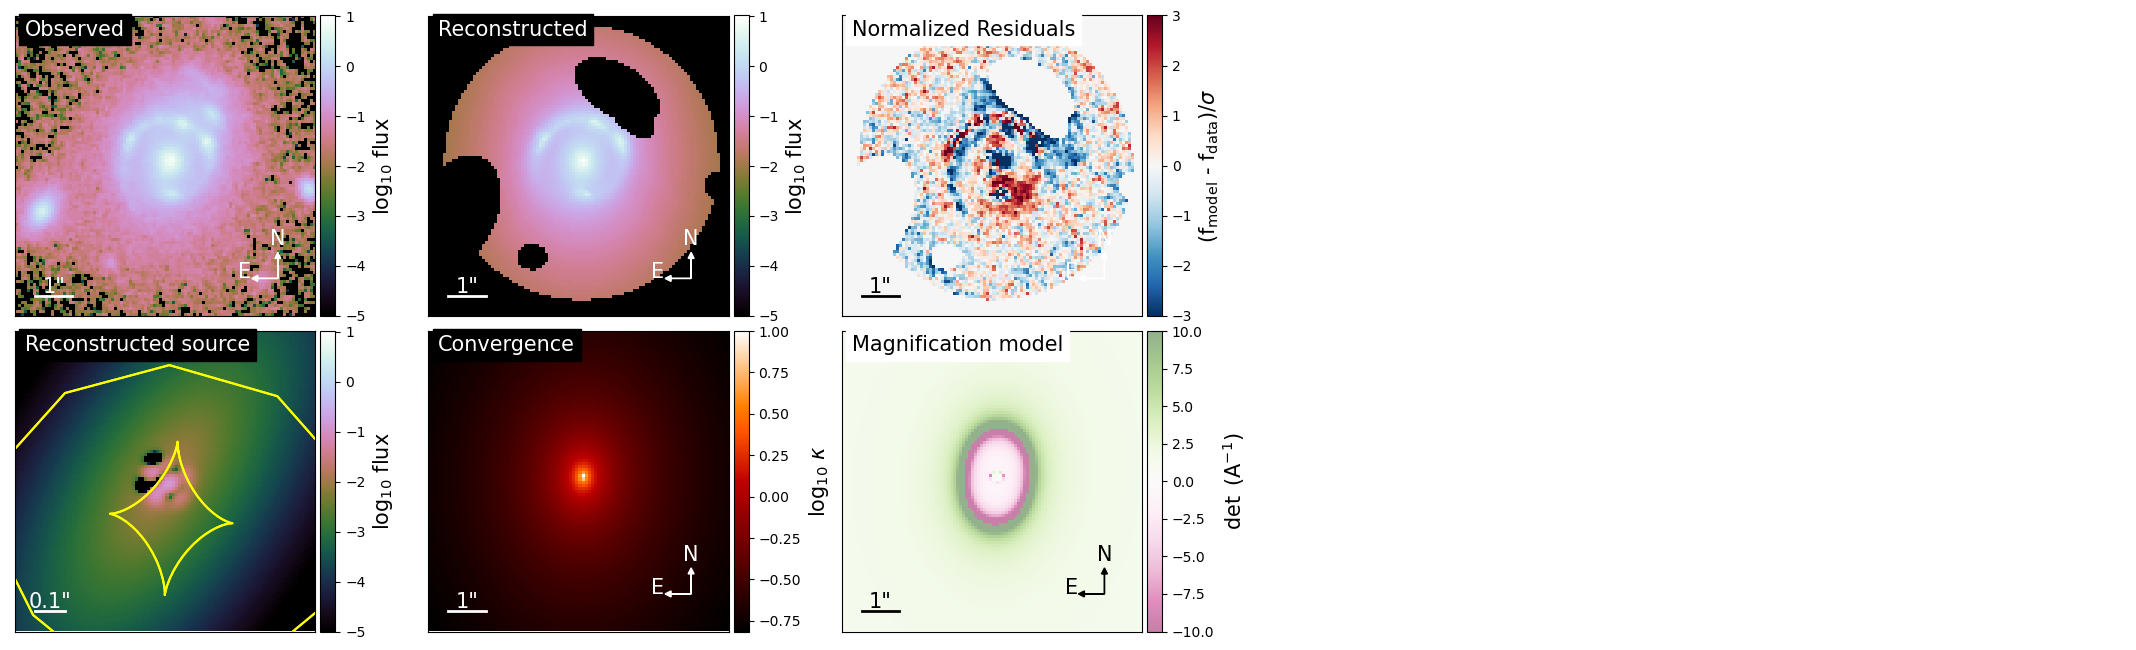

In [11]:
from lenstronomy.Plots.model_plot import ModelPlot

model_plot = ModelPlot(
    multi_band_list, kwargs_model, kwargs_result,
    arrow_size=0.02,
    cmap_string="cubehelix",
    image_likelihood_mask_list=kwargs_likelihood['image_likelihood_mask_list']
)

f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False, sharey=False)

model_plot.data_plot(ax=axes[0,0])
model_plot.model_plot(ax=axes[0,1])
model_plot.normalized_residual_plot(ax=axes[0,2], v_min=-3, v_max=3,
                                   cmap='RdBu_r')
model_plot.source_plot(ax=axes[1, 0], deltaPix_source=0.01, numPix=100, 
                       with_caustics=True)
model_plot.convergence_plot(ax=axes[1, 1], v_max=1, cmap='gist_heat')
model_plot.magnification_plot(ax=axes[1, 2], cmap='PiYG')
f.tight_layout()
f.subplots_adjust(left=None, bottom=None, right=None, 
                  top=None, wspace=0., hspace=0.05)
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/lenstronomy/Plots/model_band_plot.py:506: RuntimeWarning: invalid value encountered in log10
  im = ax.matshow(np.log10(model), origin='lower', vmin=v_min, vmax=v_max,


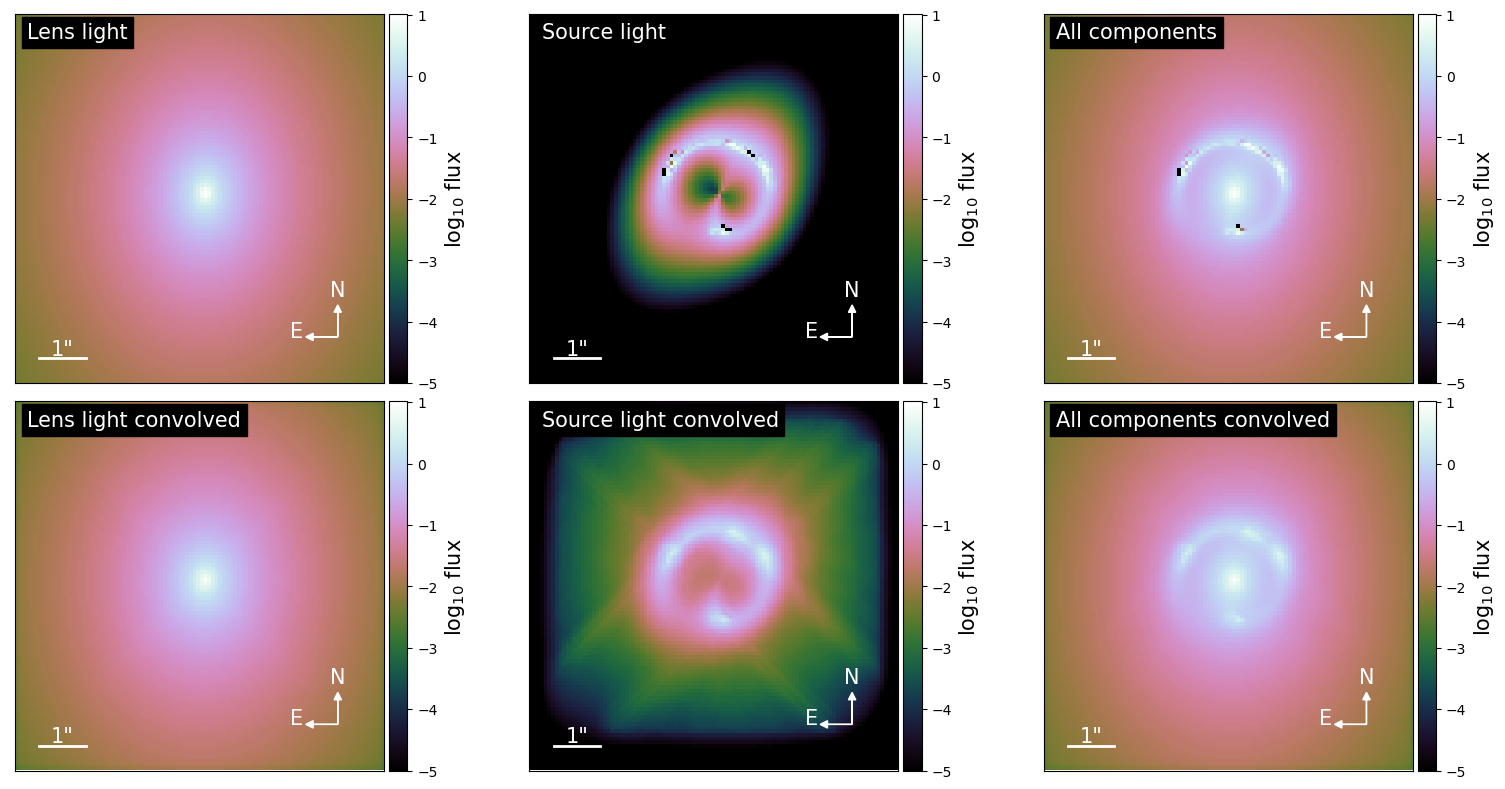

{'kwargs_lens': [{'theta_E': 1.053361193281203, 'gamma': 1.7972945164513847, 'e1': -0.1430601975779615, 'e2': -0.012050174538028261, 'center_x': -0.040361394154887834, 'center_y': 0.021159668949471702}, {'gamma1': -0.00040160463780644716, 'gamma2': 0.008288511719529964, 'ra_0': 0, 'dec_0': 0}], 'kwargs_source': [{'amp': 31.555204963662103, 'R_sersic': 0.18466856843727447, 'n_sersic': 1.0, 'e1': -0.16297717570271256, 'e2': -0.3338558140181789, 'center_x': -0.020193272912705357, 'center_y': 0.14544966968520623}, {'amp': array([1231.06171566, -347.64143465, -656.62387661,   17.81524887,
         95.44094265,  205.20039864,   82.88131952,  305.74805925,
        748.5255604 ,   21.80176998,   23.03676846,  248.17668938,
        303.88361042, -462.69976145,   63.12316394, -341.87923293,
        160.39964554, -176.87728727, -589.98592193, -288.90507637,
       -233.11181899]), 'n_max': 5, 'beta': 0.026346234259808816, 'center_x': -0.020193272912705357, 'center_y': 0.14544966968520623}], 'kwar

In [12]:
f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False, sharey=False)

model_plot.decomposition_plot(ax=axes[0,0], text='Lens light', 
                              lens_light_add=True, unconvolved=True)
model_plot.decomposition_plot(ax=axes[1,0], text='Lens light convolved',
                              lens_light_add=True)
model_plot.decomposition_plot(ax=axes[0,1], text='Source light', 
                              source_add=True, unconvolved=True)
model_plot.decomposition_plot(ax=axes[1,1], text='Source light convolved',
                              source_add=True)
model_plot.decomposition_plot(ax=axes[0,2], text='All components', 
                              source_add=True, lens_light_add=True, 
                              unconvolved=True)
model_plot.decomposition_plot(ax=axes[1,2], text='All components convolved', 
                              source_add=True, lens_light_add=True, 
                              point_source_add=True)
f.tight_layout()
f.subplots_adjust(left=None, bottom=None, right=None, 
                  top=None, wspace=0., hspace=0.05)
plt.show()
print(kwargs_result)